# Regresión logística multinomial de los resultados de una prueba médica (Test Results)

### Importando paquetes y el conjunto de datos

In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


### Consultar información básica sobre el conjunto de datos

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [49]:
print(df['Test Results'].value_counts())

Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64


In [6]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### Visualización básica del conjunto de datos

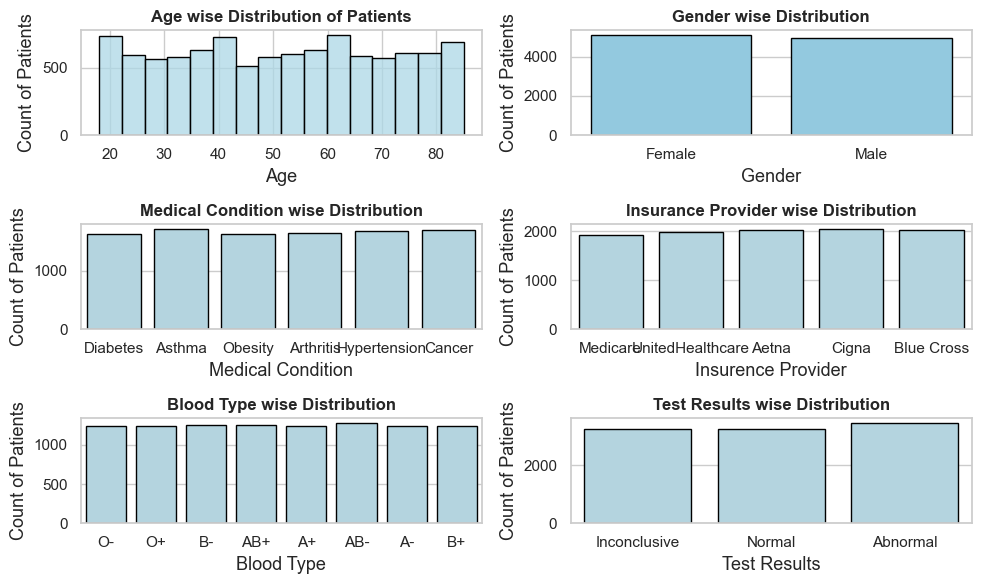

In [ ]:
plt.figure(figsize=(10,6))

# First subplot - Age Distribution
plt.subplot(3,2,1)
sns.histplot(data=df, x='Age', bins=16, color='lightblue', edgecolor='black')
plt.title('Age wise Distribution of Patients', fontweight='bold')
plt.xlabel('Age', size=13)
plt.ylabel('Count of Patients', size=13)

# Second subplot - Gender Distribution
plt.subplot(3,2,2)
color = ['lightblue','skyblue']
sns.countplot(data=df, x='Gender',color='skyblue', edgecolor='black')
plt.title('Gender wise Distribution', fontweight='bold')
plt.xlabel('Gender', size=13)
plt.ylabel('Count of Patients', size=13)

# Third subplot - Medical condition Distribution
plt.subplot(3,2,3)
sns.countplot(data=df,x='Medical Condition',edgecolor='black',color='lightblue')
plt.title('Medical Condition wise Distribution',fontweight='bold')
plt.xlabel('Medical Condition',size=13)
plt.ylabel('Count of Patients',size=13)

# Fourth subplot - Insurance Provider Distribution
plt.subplot(3,2,4)
sns.countplot(data=df,x='Insurance Provider',edgecolor='black',color='lightblue')
plt.title('Insurance Provider wise Distribution',fontweight='bold')
plt.xlabel('Insurence Provider',size=13)
plt.ylabel('Count of Patients',size=13)

# Fifth subplot - Blood Type Distribution
plt.subplot(3,2,5)
sns.countplot(data=df,x='Blood Type',edgecolor='black',color='lightblue')
plt.title('Blood Type wise Distribution',fontweight='bold')
plt.xlabel('Blood Type',size=13)
plt.ylabel('Count of Patients',size=13)

# Sixth subplot - Test Results Distribution
plt.subplot(3,2,6)
sns.countplot(data=df,x='Test Results',edgecolor='black',color='lightblue')
plt.title('Test Results wise Distribution',fontweight='bold')
plt.xlabel('Test Results',size=13)
plt.ylabel('Count of Patients',size=13)

plt.tight_layout()
plt.show()

### Conjuntos de características y variables

**Feature engineering simple: días de estancia**

In [9]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors="coerce")
df["Stay_Days"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days

**Definir X (features) y y (target)**

In [10]:
y = df["Test Results"]
drop_cols = ["Test Results","Name","Doctor","Room Number","Date of Admission","Discharge Date"]
X = df.drop(columns=drop_cols)

In [11]:
print("Tamaño de Características:",X.shape)
print("Tamaño de Variable Objetivo:",y.shape)

Tamaño de Características: (10000, 10)
Tamaño de Variable Objetivo: (10000,)


In [12]:
X.head()

,Age,Gender,Blood Type,Medical Condition,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Stay_Days
0,81,Female,O-,Diabetes,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,14
1,35,Male,O+,Asthma,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,14
2,61,Male,B-,Obesity,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,30
3,49,Male,B-,Asthma,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,1
4,51,Male,O-,Arthritis,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,24


In [13]:
y.head()

0    Inconclusive
1          Normal
2          Normal
3        Abnormal
4          Normal
Name: Test Results, dtype: object

### Codificación One-hot

**Identificar tipos para one-hot**

In [14]:
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

**Preprocesamiento: One-Hot para categóricas (sparse) y StandarScaler para numéricas**

In [62]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [39]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols),
    ]
)

In [63]:
from sklearn.pipeline import Pipeline

In [40]:
model = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(
        solver="saga",
        penalty="l2",
        C=0.5,
        max_iter=5000,
        tol=1e-3          
    ))
])

### División de entrenamiento-prueba

In [65]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

**Verificamos que el tamaño y la forma de las divisiones de entrenamiento/prueba esté en la proporción según el parámetro test_size anterior**

In [42]:
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de características del entrenamiento: (8000, 10)
Tamaño del conjunto de características de prueba: (2000, 10)
Tamaño de la variable objetivo del entrenamiento: (8000,)
Tamaño de la variable objetivo de prueba: (2000,)


### Ajuste y entrenamiento del modelo

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [68]:
model.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
y_pred = model.predict(X_test)

### Análisis de resultados

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.333
              precision    recall  f1-score   support

    Abnormal       0.35      0.48      0.41       691
Inconclusive       0.30      0.26      0.28       656
      Normal       0.33      0.25      0.29       653

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.32      2000
weighted avg       0.33      0.33      0.33      2000



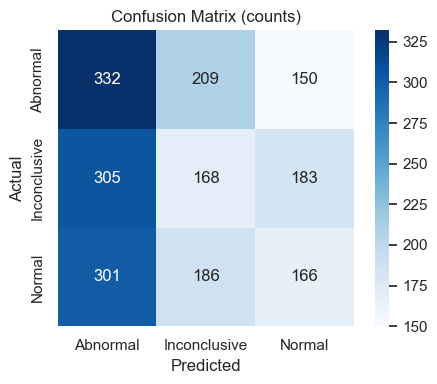

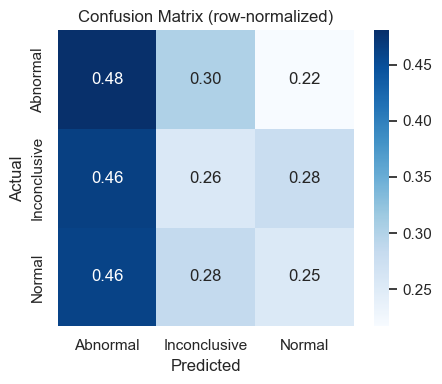

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = model.named_steps["clf"].classes_  # ['Abnormal','Inconclusive','Normal']
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, square=True)
plt.title("Confusion Matrix (counts)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

cm_norm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels, square=True)
plt.title("Confusion Matrix (row-normalized)")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()